# 03. Candidate Database

## AI 기반 저탄소 시멘트 대체재 발견 파이프라인

**목적**: 산업 폐기물 기반 후보 재료 데이터베이스 구축

---

### 후보 재료 분류

| Tier | 분류 | 예시 | CO₂ 저감 |
|------|------|------|----------|
| 1 | 철강 부산물 | BFS, Steel Slag | 75-85% |
| 2 | 석탄 화력 부산물 | Fly Ash F/C | 75-85% |
| 3 | 금속 제련 부산물 | Copper Slag, Red Mud | 65-75% |
| 4 | 실리카 풍부 폐기물 | Silica Fume, Rice Husk Ash | 85-92% |
| 5 | 기타 | Waste Glass, Metakaolin | 65-75% |

## 1. 환경 설정

In [1]:
import sys
from pathlib import Path
import json

PROJECT_ROOT = Path.cwd().parent.parent
if str(PROJECT_ROOT) not in sys.path:
    sys.path.insert(0, str(PROJECT_ROOT))

import src
from src.database import CandidateDatabase, Candidate
from src.database.candidates import DEFAULT_CANDIDATES, create_default_database

print(f"Project Root: {PROJECT_ROOT}")
print("✓ Modules loaded")

Project Root: c:\cement_final
✓ Modules loaded


## 2. 기본 후보 데이터베이스 확인

In [2]:
# 기본 정의된 후보 확인
print(f"Default Candidates: {len(DEFAULT_CANDIDATES)}")
print("\n" + "="*70)
print(f"{'#':<3} {'Name':<15} {'Formula':<20} {'CO2↓':<8} {'Tier':<5} {'Source'}")
print("="*70)

for i, c in enumerate(DEFAULT_CANDIDATES, 1):
    print(f"{i:<3} {c.name:<15} {c.formula:<20} {c.co2_reduction:<8.0f}% {c.tier:<5} {c.source}")

print("="*70)

Default Candidates: 16

#   Name            Formula              CO2↓     Tier  Source
1   BFS             Al2Ca6MgO16Si4       85      % 1     고로 슬래그
2   SteelSlag       Ca8Fe2MgO16Si3       75      % 1     제강 슬래그
3   EAFSlag         AlCa5Fe3O16Si4       75      % 1     전기로 슬래그
4   FlyAshF         Al3CaFeO16Si6        85      % 2     Fly Ash Class F
5   FlyAshC         Al2Ca4O16Si5         85      % 2     Fly Ash Class C
6   BottomAsh       Al3CaFe2O16Si5       75      % 2     바닥재
7   CopperSlag      AlCa2Fe5O16Si4       75      % 3     구리 슬래그
8   RedMud          Al4Fe4O16Si2Ti       65      % 3     적니 (알루미늄 정련)
9   NickelSlag      Fe5Mg2O16Si4         75      % 3     니켈 슬래그
10  SilicaFume      O16Si8               88      % 4     실리카 흄
11  RiceHuskAsh     KO16Si8              92      % 4     왕겨재
12  POFA            CaK2O16Si6           88      % 4     팜유 연료재
13  WasteGlass      Ca2Na2O16Si6         75      % 5     폐유리
14  CeramicWaste    Al4O16Si6            65      % 5     폐도자기
15  

## 3. 데이터베이스 생성

In [3]:
# 데이터베이스 경로
db_path = src.DATA_DIR / "candidates" / "candidates.json"
db_path.parent.mkdir(parents=True, exist_ok=True)

# 데이터베이스 생성
db = create_default_database(db_path)

print(f"✓ Database created: {db_path}")
print(f"  Total candidates: {len(db)}")

✓ Database created: c:\cement_final\data\candidates\candidates.json
  Total candidates: 16


## 4. Tier별 후보 확인

In [4]:
# Tier별 분류
tier_names = {
    1: "철강 산업 부산물",
    2: "석탄 화력 부산물",
    3: "금속 제련 부산물",
    4: "실리카 풍부 폐기물",
    5: "기타 산업 폐기물"
}

for tier in range(1, 6):
    candidates = db.list_by_tier(tier)
    print(f"\n{'='*50}")
    print(f"Tier {tier}: {tier_names[tier]} ({len(candidates)}종)")
    print(f"{'='*50}")
    
    for c in candidates:
        print(f"  • {c.name:<12} | {c.formula:<18} | CO₂↓ {c.co2_reduction}%")
        print(f"    Composition: {c.composition}")


Tier 1: 철강 산업 부산물 (3종)
  • BFS          | Al2Ca6MgO16Si4     | CO₂↓ 85%
    Composition: {'Ca': 6, 'Si': 4, 'Al': 2, 'Mg': 1, 'O': 16}
  • SteelSlag    | Ca8Fe2MgO16Si3     | CO₂↓ 75%
    Composition: {'Ca': 8, 'Si': 3, 'Fe': 2, 'Mg': 1, 'O': 16}
  • EAFSlag      | AlCa5Fe3O16Si4     | CO₂↓ 75%
    Composition: {'Ca': 5, 'Si': 4, 'Fe': 3, 'Al': 1, 'O': 16}

Tier 2: 석탄 화력 부산물 (3종)
  • FlyAshF      | Al3CaFeO16Si6      | CO₂↓ 85%
    Composition: {'Si': 6, 'Al': 3, 'Fe': 1, 'Ca': 1, 'O': 16}
  • FlyAshC      | Al2Ca4O16Si5       | CO₂↓ 85%
    Composition: {'Ca': 4, 'Si': 5, 'Al': 2, 'O': 16}
  • BottomAsh    | Al3CaFe2O16Si5     | CO₂↓ 75%
    Composition: {'Si': 5, 'Al': 3, 'Fe': 2, 'Ca': 1, 'O': 16}

Tier 3: 금속 제련 부산물 (3종)
  • CopperSlag   | AlCa2Fe5O16Si4     | CO₂↓ 75%
    Composition: {'Fe': 5, 'Si': 4, 'Ca': 2, 'Al': 1, 'O': 16}
  • RedMud       | Al4Fe4O16Si2Ti     | CO₂↓ 65%
    Composition: {'Fe': 4, 'Al': 4, 'Si': 2, 'Ti': 1, 'O': 16}
  • NickelSlag   | Fe5Mg2O16Si4       | C

## 5. 추가 후보 등록 (선택사항)

In [5]:
# 새 후보 추가 예시 (필요시 주석 해제)

# 추가 후보 정의
additional_candidates = [
    # Candidate(
    #     name="NewMaterial",
    #     composition={'Ca': 4, 'Si': 4, 'O': 12},
    #     co2_reduction=70,
    #     source="새로운 출처",
    #     tier=5,
    #     volume=1000
    # ),
]

for candidate in additional_candidates:
    db.add(candidate)
    print(f"Added: {candidate.name}")

if additional_candidates:
    db.save()
    print(f"\n✓ Database updated: {len(db)} candidates")
else:
    print("No additional candidates added (using defaults)")

No additional candidates added (using defaults)


## 6. 조성 분석

In [6]:
import pandas as pd

# 조성 데이터 수집
data = []
for c in db:
    row = {
        'Name': c.name,
        'Tier': c.tier,
        'CO2_Reduction': c.co2_reduction,
        'Total_Atoms': c.total_atoms,
        'Ca': c.composition.get('Ca', 0),
        'Si': c.composition.get('Si', 0),
        'Al': c.composition.get('Al', 0),
        'Fe': c.composition.get('Fe', 0),
        'O': c.composition.get('O', 0),
    }
    # Ca/Si 비율
    if row['Si'] > 0:
        row['Ca_Si_Ratio'] = row['Ca'] / row['Si']
    else:
        row['Ca_Si_Ratio'] = 0
    data.append(row)

df = pd.DataFrame(data)
print("Candidate Composition Summary:")
print(df.to_string(index=False))

Candidate Composition Summary:
        Name  Tier  CO2_Reduction  Total_Atoms  Ca  Si  Al  Fe  O  Ca_Si_Ratio
         BFS     1             85           29   6   4   2   0 16     1.500000
   SteelSlag     1             75           30   8   3   0   2 16     2.666667
     EAFSlag     1             75           29   5   4   1   3 16     1.250000
     FlyAshF     2             85           27   1   6   3   1 16     0.166667
     FlyAshC     2             85           27   4   5   2   0 16     0.800000
   BottomAsh     2             75           27   1   5   3   2 16     0.200000
  CopperSlag     3             75           28   2   4   1   5 16     0.500000
      RedMud     3             65           27   0   2   4   4 16     0.000000
  NickelSlag     3             75           27   0   4   0   5 16     0.000000
  SilicaFume     4             88           24   0   8   0   0 16     0.000000
 RiceHuskAsh     4             92           25   0   8   0   0 16     0.000000
        POFA     4   

In [7]:
# 조성 통계
print("\nComposition Statistics:")
print(f"  Ca/Si Ratio Range: {df['Ca_Si_Ratio'].min():.2f} - {df['Ca_Si_Ratio'].max():.2f}")
print(f"  CO2 Reduction Range: {df['CO2_Reduction'].min():.0f}% - {df['CO2_Reduction'].max():.0f}%")
print(f"  Avg Atoms per Structure: {df['Total_Atoms'].mean():.1f}")

# Ca 함유 재료
ca_materials = df[df['Ca'] > 0]['Name'].tolist()
print(f"\n  Materials with Ca: {len(ca_materials)}")

# Ca 없는 재료 (포졸란)
no_ca = df[df['Ca'] == 0]['Name'].tolist()
print(f"  Materials without Ca (pozzolans): {len(no_ca)}")
if no_ca:
    print(f"    → {', '.join(no_ca)}")


Composition Statistics:
  Ca/Si Ratio Range: 0.00 - 2.67
  CO2 Reduction Range: 65% - 92%
  Avg Atoms per Structure: 26.6

  Materials with Ca: 9
  Materials without Ca (pozzolans): 7
    → RedMud, NickelSlag, SilicaFume, RiceHuskAsh, CeramicWaste, Metakaolin, CoalGangue


## 7. 시각화

C:\Users\ACER\AppData\Local\Temp\ipykernel_41664\2008774193.py:31: UserWarning: Glyph 52384 (\N{HANGUL SYLLABLE CEOL}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\ACER\AppData\Local\Temp\ipykernel_41664\2008774193.py:31: UserWarning: Glyph 44053 (\N{HANGUL SYLLABLE GANG}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\ACER\AppData\Local\Temp\ipykernel_41664\2008774193.py:31: UserWarning: Glyph 49328 (\N{HANGUL SYLLABLE SAN}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\ACER\AppData\Local\Temp\ipykernel_41664\2008774193.py:31: UserWarning: Glyph 50629 (\N{HANGUL SYLLABLE EOB}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\ACER\AppData\Local\Temp\ipykernel_41664\2008774193.py:31: UserWarning: Glyph 48512 (\N{HANGUL SYLLABLE BU}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\ACER\AppData\Local\Temp\ipykernel_41664\2008774193.py:31: UserWarning: Glyph 47932 (\N{HANGUL SYLLABLE MUL}) missing from fon

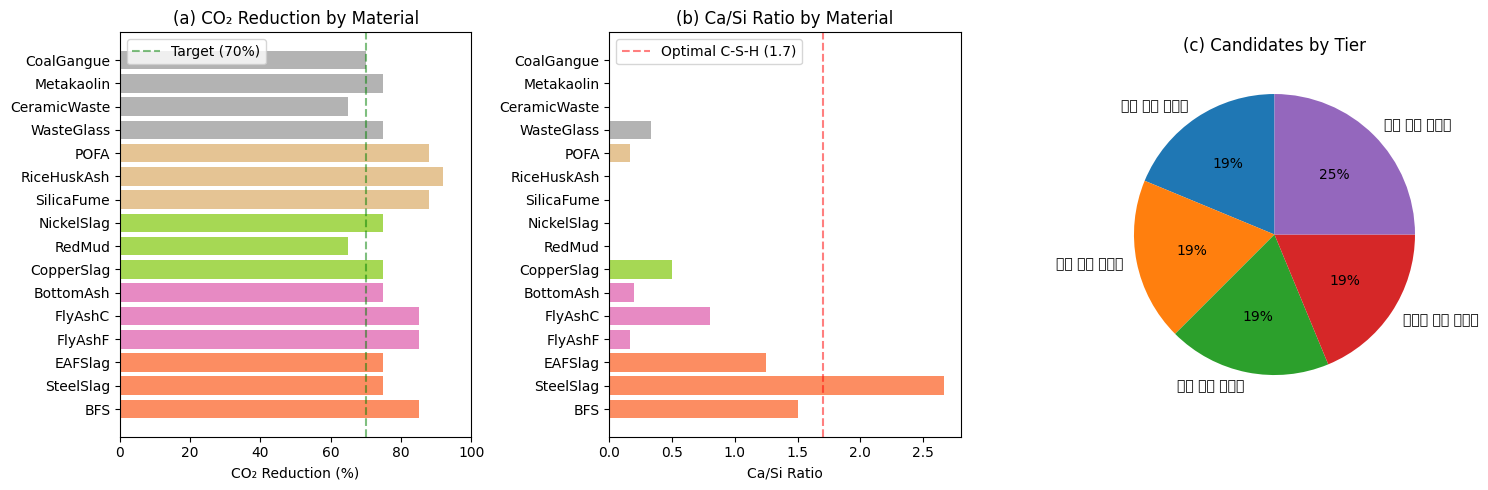


✓ Saved: c:\cement_final\figures\candidate_database_overview.png


In [8]:
import matplotlib.pyplot as plt
import numpy as np

fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# (a) CO2 저감률 분포
ax = axes[0]
colors = plt.cm.Set2(df['Tier'] / 5)
bars = ax.barh(df['Name'], df['CO2_Reduction'], color=colors)
ax.set_xlabel('CO₂ Reduction (%)')
ax.set_title('(a) CO₂ Reduction by Material')
ax.set_xlim(0, 100)
ax.axvline(x=70, color='g', linestyle='--', alpha=0.5, label='Target (70%)')
ax.legend()

# (b) Ca/Si 비율 분포
ax = axes[1]
ax.barh(df['Name'], df['Ca_Si_Ratio'], color=colors)
ax.set_xlabel('Ca/Si Ratio')
ax.set_title('(b) Ca/Si Ratio by Material')
ax.axvline(x=1.7, color='r', linestyle='--', alpha=0.5, label='Optimal C-S-H (1.7)')
ax.legend()

# (c) Tier별 개수
ax = axes[2]
tier_counts = df.groupby('Tier').size()
tier_labels = [tier_names.get(t, f'Tier {t}') for t in tier_counts.index]
ax.pie(tier_counts, labels=tier_labels, autopct='%1.0f%%', startangle=90)
ax.set_title('(c) Candidates by Tier')

plt.tight_layout()
plt.savefig(src.FIGURES_DIR / 'candidate_database_overview.png', dpi=150, bbox_inches='tight')
plt.show()

print(f"\n✓ Saved: {src.FIGURES_DIR / 'candidate_database_overview.png'}")

## 8. 스크리닝 대상 선택

In [9]:
# 스크리닝 대상 선택 (전체 또는 일부)
# 기본: 전체 후보

screening_candidates = list(db)

# 특정 Tier만 선택하려면:
# screening_candidates = db.list_by_tier(1) + db.list_by_tier(2)

# CO2 저감률 70% 이상만:
# screening_candidates = [c for c in db if c.co2_reduction >= 70]

print(f"Screening Target: {len(screening_candidates)} candidates")
print("\nSelected candidates:")
for i, c in enumerate(screening_candidates, 1):
    print(f"  {i:2}. {c.name} (Tier {c.tier}, CO₂↓ {c.co2_reduction}%)")

Screening Target: 16 candidates

Selected candidates:
   1. BFS (Tier 1, CO₂↓ 85%)
   2. SteelSlag (Tier 1, CO₂↓ 75%)
   3. EAFSlag (Tier 1, CO₂↓ 75%)
   4. FlyAshF (Tier 2, CO₂↓ 85%)
   5. FlyAshC (Tier 2, CO₂↓ 85%)
   6. BottomAsh (Tier 2, CO₂↓ 75%)
   7. CopperSlag (Tier 3, CO₂↓ 75%)
   8. RedMud (Tier 3, CO₂↓ 65%)
   9. NickelSlag (Tier 3, CO₂↓ 75%)
  10. SilicaFume (Tier 4, CO₂↓ 88%)
  11. RiceHuskAsh (Tier 4, CO₂↓ 92%)
  12. POFA (Tier 4, CO₂↓ 88%)
  13. WasteGlass (Tier 5, CO₂↓ 75%)
  14. CeramicWaste (Tier 5, CO₂↓ 65%)
  15. Metakaolin (Tier 5, CO₂↓ 75%)
  16. CoalGangue (Tier 5, CO₂↓ 70%)


## 9. 스크리닝 목록 저장

In [10]:
# 스크리닝 대상 목록 저장
screening_list = {
    'total': len(screening_candidates),
    'candidates': [c.name for c in screening_candidates]
}

screening_list_path = src.DATA_DIR / "candidates" / "screening_list.json"
with open(screening_list_path, 'w', encoding='utf-8') as f:
    json.dump(screening_list, f, indent=2)

print(f"✓ Screening list saved: {screening_list_path}")
print(f"  Candidates: {screening_list['total']}")

✓ Screening list saved: c:\cement_final\data\candidates\screening_list.json
  Candidates: 16


## 10. 요약

In [11]:
print("\n" + "="*60)
print("CANDIDATE DATABASE SUMMARY")
print("="*60)

print(f"""
Total Candidates: {len(db)}

By Tier:
  Tier 1 (철강 부산물):     {len(db.list_by_tier(1))}
  Tier 2 (석탄 화력):       {len(db.list_by_tier(2))}
  Tier 3 (금속 제련):       {len(db.list_by_tier(3))}
  Tier 4 (실리카 풍부):     {len(db.list_by_tier(4))}
  Tier 5 (기타):            {len(db.list_by_tier(5))}

Files Generated:
  • {db_path}
  • {screening_list_path}
  • {src.FIGURES_DIR / 'candidate_database_overview.png'}

Screening Target: {len(screening_candidates)} candidates

✅ Database ready for screening!
""")

print("📋 Next Step: 04_Screening_Pipeline.ipynb")


CANDIDATE DATABASE SUMMARY

Total Candidates: 16

By Tier:
  Tier 1 (철강 부산물):     3
  Tier 2 (석탄 화력):       3
  Tier 3 (금속 제련):       3
  Tier 4 (실리카 풍부):     3
  Tier 5 (기타):            4

Files Generated:
  • c:\cement_final\data\candidates\candidates.json
  • c:\cement_final\data\candidates\screening_list.json
  • c:\cement_final\figures\candidate_database_overview.png

Screening Target: 16 candidates

✅ Database ready for screening!

📋 Next Step: 04_Screening_Pipeline.ipynb


---

## 완료

이 노트북에서 구축한 데이터베이스:

- **16종** 산업 폐기물 기반 후보 재료
- Tier 1-5 분류
- 조성, CO₂ 저감률, 출처 정보 포함

**다음 단계**: `04_Screening_Pipeline.ipynb`에서 자동화 스크리닝을 실행합니다.